In [1]:
# import packages
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
def power(p_null, p_alt, n, alpha = .05, plot = True):
    """
    Compute the power of detecting the difference in two populations with 
    different proportion parameters, given a desired alpha rate.
    
    Input parameters:
        p_null: base success rate under null hypothesis
        p_alt : desired success rate to be detected, must be larger than
                p_null
        n     : number of observations made in each group
        alpha : Type-I error rate
        plot  : boolean for whether or not a plot of distributions will be
                created
    
    Output value:
        power : Power to detect the desired difference, under the null.
    """
    
    # Compute the power
    se_null = np.sqrt((p_null * (1-p_null) + p_null * (1-p_null)) / n)
    null_dist = stats.norm(loc = 0, scale = se_null)
    p_crit = null_dist.ppf(1 - alpha)
    
    se_alt  = np.sqrt((p_null * (1-p_null) + p_alt  * (1-p_alt) ) / n)
    alt_dist = stats.norm(loc = p_alt - p_null, scale = se_alt)
    beta = alt_dist.cdf(p_crit)
    
    if plot:
        # Compute distribution heights
        low_bound = null_dist.ppf(.01)
        high_bound = alt_dist.ppf(.99)
        x = np.linspace(low_bound, high_bound, 201)
        y_null = null_dist.pdf(x)
        y_alt = alt_dist.pdf(x)

        # Plot the distributions
        plt.plot(x, y_null)
        plt.plot(x, y_alt)
        plt.vlines(p_crit, 0, np.amax([null_dist.pdf(p_crit), alt_dist.pdf(p_crit)]),
                   linestyles = '--')
        plt.fill_between(x, y_null, 0, where = (x >= p_crit), alpha = .5)
        plt.fill_between(x, y_alt , 0, where = (x <= p_crit), alpha = .5)
        
        plt.legend(['null','alt'])
        plt.xlabel('difference')
        plt.ylabel('density')
        plt.show()
    
    # return power
    return (1 - beta)
    

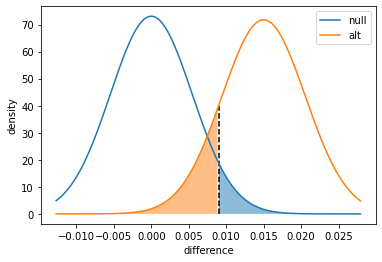

0.8605546489741601

In [11]:
power(.16, .175, 3250*5.55/2)

In [5]:
def experiment_size(p_null, p_alt, alpha = .05, beta = .20):
    """
    Compute the minimum number of samples needed to achieve a desired power
    level for a given effect size.
    
    Input parameters:
        p_null: base success rate under null hypothesis
        p_alt : desired success rate to be detected
        alpha : Type-I error rate
        beta  : Type-II error rate
    
    Output value:
        n : Number of samples required for each group to obtain desired power
    """
    
    # Get necessary z-scores and standard deviations (@ 1 obs per group)
    z_null = stats.norm.ppf(1 - alpha)
    z_alt  = stats.norm.ppf(beta)
    sd_null = np.sqrt(p_null * (1-p_null) + p_null * (1-p_null))
    sd_alt  = np.sqrt(p_null * (1-p_null) + p_alt  * (1-p_alt) )
    
    # Compute and return minimum sample size
    p_diff = p_alt - p_null
    n = ((z_null*sd_null - z_alt*sd_alt) / p_diff) ** 2
    return np.ceil(n)

In [17]:
experiment_size(.02, .023,alpha = .025)

34930.0

In [ ]:
 33 223 

In [10]:
9481.0/(3250/2)


5.834461538461539

In [12]:
5.55*3250/2

9018.75

In [18]:
import pandas as pd
df = pd.read_clipboard()

In [20]:
# import packages

import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.stats import proportion as proptests

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [38]:
# get number of trials and number of 'successes'
n_obs = experimental+control

In [ ]:
n_control = data.groupby('condition').size()[0]

In [37]:
experimental = df['Experiment Cookies'].sum()

In [39]:
n_control = df['Control Cookies'].sum()

In [23]:
import statsmodels

In [29]:
statsmodels.stats.weightstats.ttest_ind(df['Control Cookies'], df['Experiment Cookies'], alternative='two-sided')

AttributeError: module 'statsmodels.stats' has no attribute 'weightstats'

In [33]:
stats.ttest_ind(df['Control Cookies'], df['Experiment Cookies'])

Ttest_indResult(statistic=-0.5667703149522242, pvalue=0.5731350217922668)

In [40]:
p = 0.5
n_trials = 200_000

In [41]:
samples = np.random.binomial(n_obs, p, n_trials)

In [42]:
print(np.logical_or(samples <= n_control, samples >= (n_obs - n_control)).mean())

0.107805
